Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

* Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: Record index
* dteday: Date
* season: Season (1:springer, 2:summer, 3:fall, 4:winter)
* yr: Year (0: 2011, 1:2012)
*  mnth: Month (1 to 12)
*  hr: Hour (0 to 23)
*  holiday: weather day is holiday or not (extracted from Holiday Schedule)
*  weekday: Day of the week
*  workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
*  weathersit: (extracted from Freemeteo)
*  1: Clear, Few clouds, Partly cloudy, Partly cloudy
*  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in   *   hourly scale)
*   atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50    (only in hourly scale)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users
*   cnt: count of total rental bikes including both casual and registered 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_bikes.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train = pd.read_csv('train_bikes.csv',parse_dates=['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

<AxesSubplot:xlabel='season', ylabel='count'>

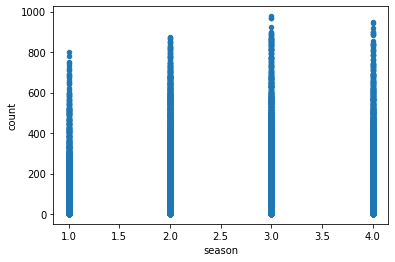

In [7]:
train.plot.scatter(x='season',y='count')

The count of bike renting is more in the fall and winter season

<AxesSubplot:xlabel='holiday', ylabel='count'>

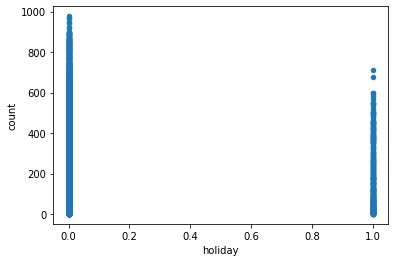

In [8]:
train.plot.scatter(x='holiday',y="count")

On Non working day or on some weekend holiday the count of bike rental is less 

In [9]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [10]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

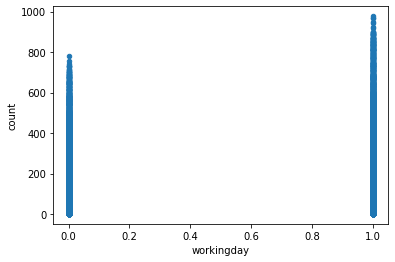

In [11]:
train.plot.scatter(x='workingday',y='count')

on working day the demand for bikes is more

<AxesSubplot:xlabel='weather', ylabel='count'>

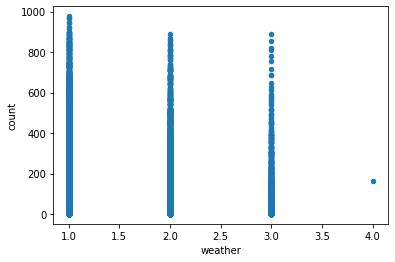

In [12]:
train.plot.scatter(x='weather',y='count')

The bike rental is more on very clear weather day

<AxesSubplot:xlabel='temp', ylabel='count'>

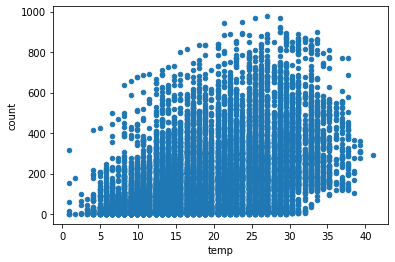

In [13]:
train.plot.scatter(x='temp',y='count')

When temp is around 25 , highest recording of renting of bikes has happened

<AxesSubplot:xlabel='atemp', ylabel='count'>

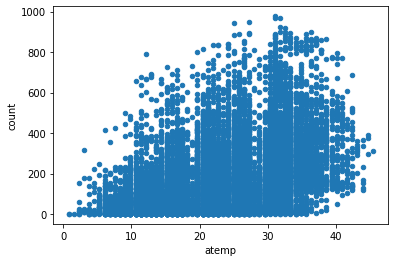

In [14]:
train.plot.scatter(x='atemp',y='count')

In [15]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<AxesSubplot:xlabel='humidity', ylabel='count'>

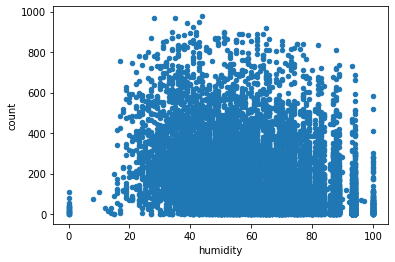

In [16]:
train.plot.scatter(x='humidity',y='count')

Higher count recorded when the humidity is in the range (25,40)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

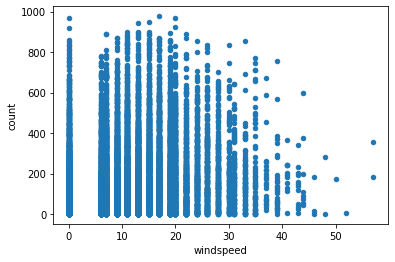

In [17]:
train.plot.scatter(x='windspeed',y='count')

<AxesSubplot:xlabel='casual', ylabel='count'>

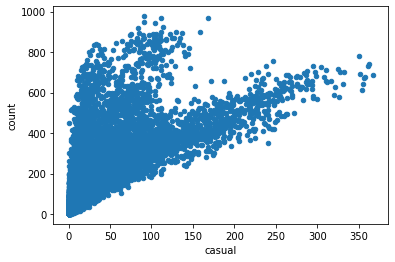

In [18]:
train.plot.scatter(x='casual',y='count')

In [19]:
train.rename(columns={"count":'Total_count'},inplace = True)

In [20]:
import pandas_profiling
train.profile_report()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
train.shape

(10886, 12)

In [22]:
train.isnull().values.any()

False

In [23]:
# function to create a count plot based on hour in a particular year
def count_plot_hour(data,year=None,agg='sum'):
    dd = data
    if year:dd = dd[dd.datetime.dt.year==year]
    dd.loc[:,('hour')] = dd.datetime.dt.hour
    by_hour = dd.groupby(['hour','workingday'])['Total_count'].agg(agg).unstack()
    return by_hour.plot(kind='bar',width=0.9,figsize=(15,5),ylim=(0,80000),title = 'Year = {0}'.format(year))

c:\users\pravr\.conda\envs\bikes\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\pravr\.conda\envs\bikes\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'Year = 2011'}, xlabel='hour'>

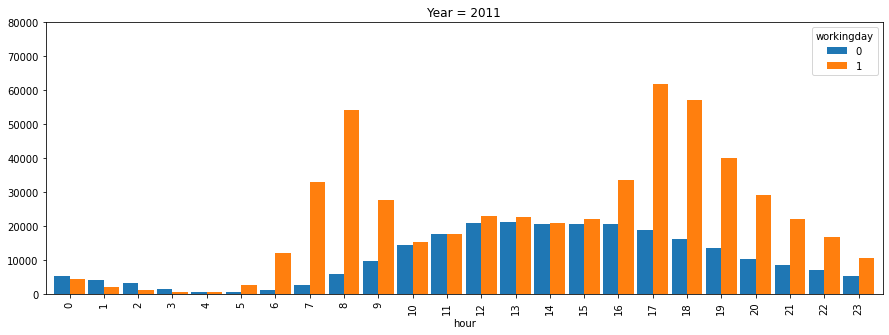

In [24]:
count_plot_hour(train,2011)

In the year 2011, we can observe that more rental happened On a working day, during morning and evening hours 

c:\users\pravr\.conda\envs\bikes\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\pravr\.conda\envs\bikes\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

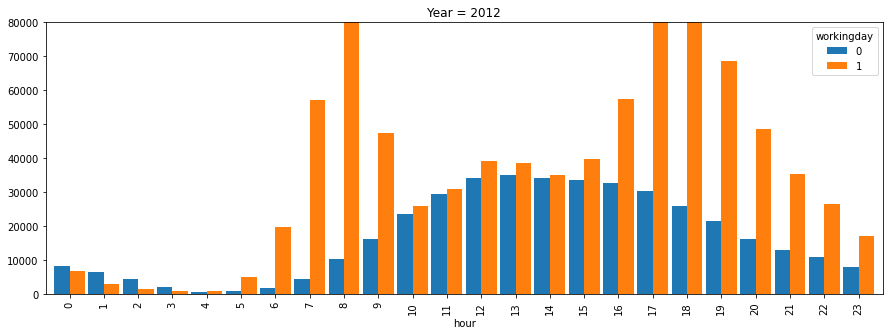

In [25]:
count_plot_hour(train,year=2012)

COmpare to previous year 2011 there is rise in bike rental during morning and evening hours on a working day

In [26]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  Total_count  
0        81        0.0       3          13           16  
1        80        0.0       8          32           40  
2        80        0.0       5          27           32  
3        75        0.0       3          10           13  
4        75        0.0       0           1            1

In [27]:
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  Total_count  
10881  19.695        50    26.0027       7         329          336  
10882  17.425        57    15.0013      10         231          241  
10883  15.910        61    15.0013       4         164          168  
10884  17.425        61     6.0032      12         117          129  
10885  16.665        66     8.9981       4          84           88

In [28]:
# plot the count as per month and hour for both years 

def plot_by_year(agg_attri,title):
    dd = train.copy()
    dd['year'] = dd.datetime.dt.year
    dd['month'] = dd.datetime.dt.month
    dd['hour'] = dd.datetime.dt.hour
    
    by_year = dd.groupby([agg_attri,'year'])['Total_count'].agg('sum').unstack()
    return by_year.plot(kind='bar',figsize=(15,5),width=0.9,title=title)

<AxesSubplot:title={'center':'Bike rent per hour in the year 2011 and 2012'}, xlabel='hour'>

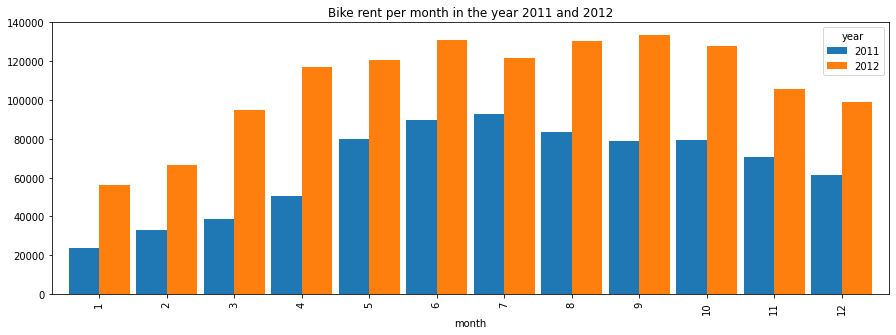

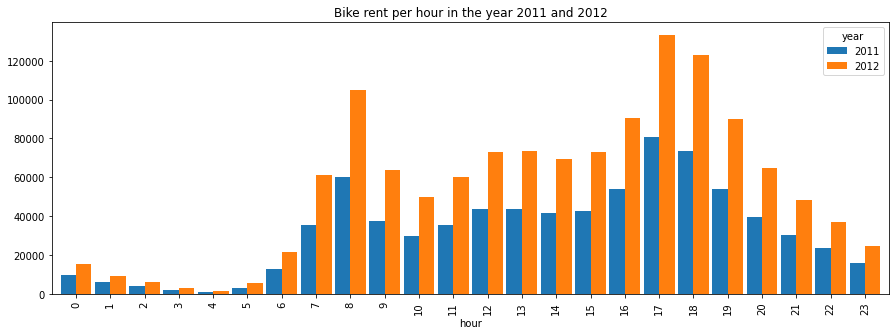

In [29]:
plot_by_year('month','Bike rent per month in the year 2011 and 2012')
plot_by_year('hour','Bike rent per hour in the year 2011 and 2012')

In [30]:
train.head(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5 2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6 2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7 2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8 2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9 2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  Total_count  
0        81     0.0000       3          13           16  
1        80     0.0000       8          32           40  
2        80     0.0000       5          27           32  
3        75     0.0000       3          10           13  
4        75     0.0000       0           1            1  
5        75     6.0032       0           1            1  
6        80     0.0000       2           0            2  
7        86     0.0000       1           2            3  
8        75     0.0000       1           7            8  
9        76     0.0000       8           6           14

In [31]:
# plot the distribution of count for every hour in a year
def plot_hours(data,message = ''):
    
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[dd.hour==hour]['Total_count'].values
    
    plt.figure(figsize=(20,10))
    plt.ylabel('Rent count')
    plt.xlabel('Hours')
    plt.title('count vs hours\n' + message)
    plt.boxplot([hours[hour] for hour in range(24)])
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])

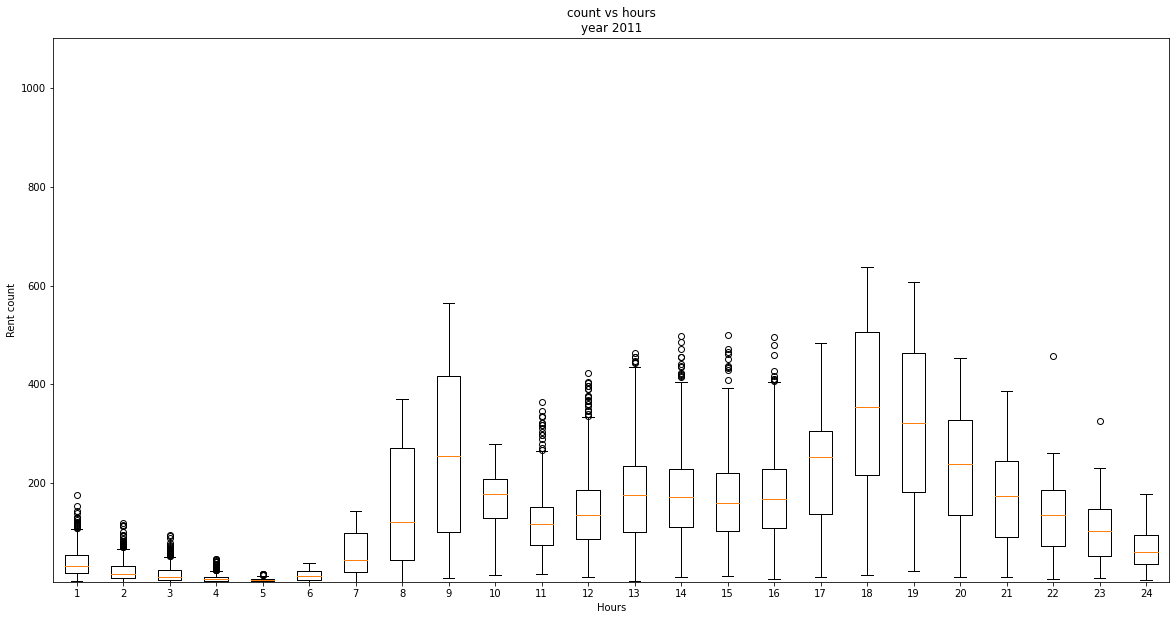

In [32]:
plot_hours(train[train.datetime.dt.year==2011],'year 2011') # box plot for hourly count for the mentioned year

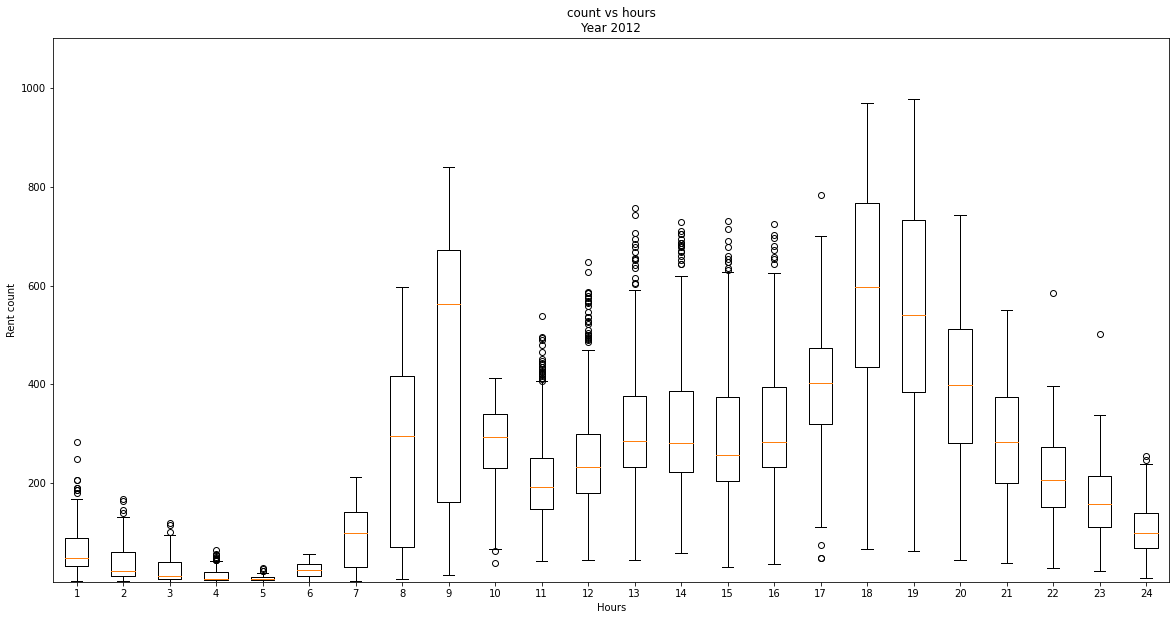

In [33]:
plot_hours(train[train.datetime.dt.year==2012],'Year 2012')

In [34]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  Total_count  
0        81        0.0       3          13           16  
1        80        0.0       8          32           40  
2        80        0.0       5          27           32  
3        75        0.0       3          10           13  
4        75        0.0       0           1            1

In [35]:
dt = pd.to_datetime(train.datetime)
dt

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [36]:
train['hour'] = dt.map(lambda x : x.hour)

In [37]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  Total_count  hour  
0        81        0.0       3          13           16     0  
1        80        0.0       8          32           40     1  
2        80        0.0       5          27           32     2  
3        75        0.0       3          10           13     3  
4        75        0.0       0           1            1     4

In [38]:
test = pd.read_csv('test_bikes.csv',parse_dates=['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [39]:
dt_1 = pd.to_datetime(test.datetime)

In [40]:
test['hour'] = dt.map(lambda x : x.hour)
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     1  
2        56     0.0000     2  
3        56    11.0014     3  
4        56    11.0014     4

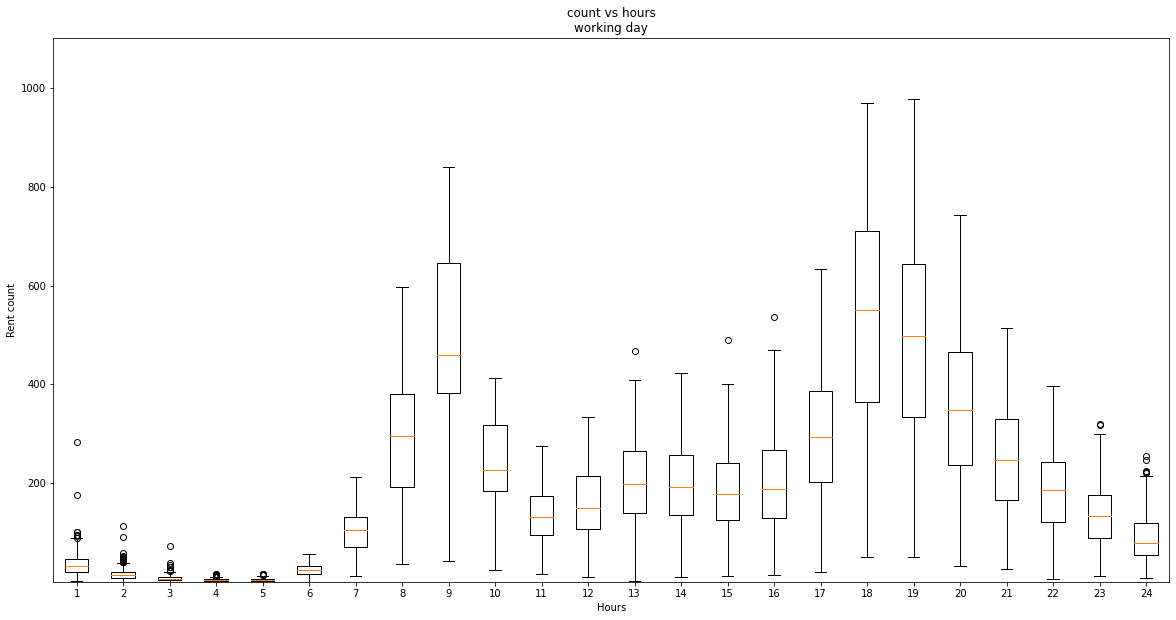

In [41]:
plot_hours(train[train.workingday==1],'working day')

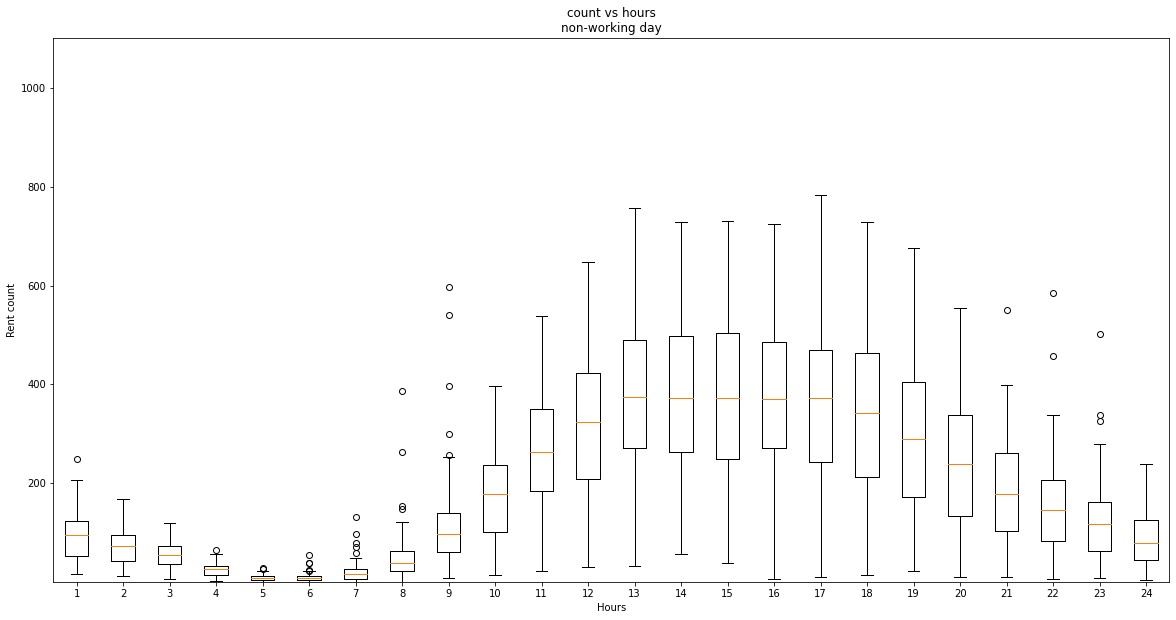

In [42]:
plot_hours(train[train.workingday == 0],'non-working day')

On a Non-working day there is a rise in mid hours than in early and late hours

In [43]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [44]:
train['hour'] = train['hour'].apply(categorical_to_numeric)
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  Total_count  hour  
0        81        0.0       3          13           16     0  
1        80        0.0       8          32           40     0  
2        80        0.0       5          27           32     0  
3        75        0.0       3          10           13     0  
4        75        0.0       0           1            1     0

In [45]:
test['hour'] = test['hour'].apply(categorical_to_numeric)
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  
0        56    26.0027     0  
1        56     0.0000     0  
2        56     0.0000     0  
3        56    11.0014     0  
4        56    11.0014     0

In [46]:
# drop unnecessary columns

train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [47]:
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  Total_count  hour  
0       3          13           16     0  
1       8          32           40     0  
2       5          27           32     0  
3       3          10           13     0  
4       0           1            1     0

In [48]:
hours = train.groupby(['hour']).agg('mean')['Total_count']
hours

hour
0     25.177720
1    216.612680
2    328.587719
3    188.050439
Name: Total_count, dtype: float64

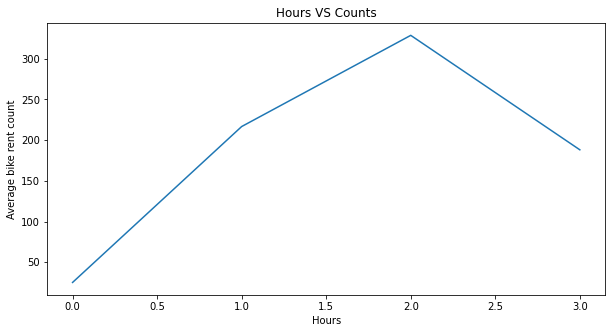

In [50]:
# plotting the average bike rental count for every hour
figure,axes = plt.subplots(figsize=(10,5))
hours = train.groupby(['hour']).agg('mean')['Total_count']
hours.plot(kind='line',ax=axes)
plt.title('Hours VS Counts')
axes.set_xlabel('Hours')
axes.set_ylabel('Average bike rent count')
plt.show()

In [54]:
a = train.groupby('temp')[['Total_count']].mean()
a.head()

Total_count
temp             
0.82    77.714286
1.64    91.500000
2.46    43.000000
3.28    19.272727
4.10    50.272727

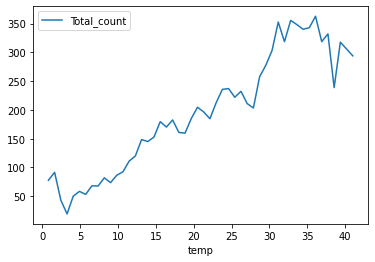

In [55]:
a.plot()
plt.show()

With increase in temp theres is rise in the bike rental count

In [56]:
# atemp average count
a1 = train.groupby('atemp')[['Total_count']].mean()
a1.head()

Total_count
atemp             
0.760     1.000000
1.515     3.000000
2.275    38.000000
3.030    82.285714
3.790    39.062500

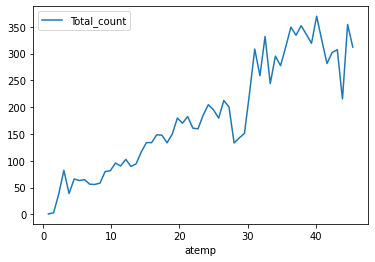

In [57]:
a1.plot()
plt.show()

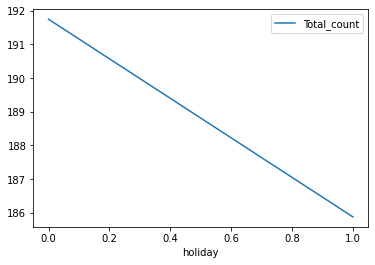

In [58]:
# count based on holiday
a2 = train.groupby('holiday')[['Total_count']].mean()
a2.plot()
plt.show()

In [59]:
# method to  select the features. If a feature is not in the blaklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log']
    return [feat for feat in data.columns if feat not in black_list]

In [60]:
select_features(train)

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'Total_count',
 'hour']